### NN Anatomy

* Simple Vector Data (samples, features) is often processed by densely connected layers - dense or fully connected (Dense class in Keras)
* Sequence data, stored in 3D tensors of shape (samples, timesteps, features) - processed by recurrent layers such as an LSTM
* Image data, stored in 4d tensors, is usually processed by 2D convolution layers (Conv2D)

### Loss functions
Binary Cross Entropy: two-class classification
Categorical Cross Entropy: Multiclass classification
Mean-Squared-Error: Regression
Connectionist Temporal Classification (?): Sequence-Learning Problem


### Keras APIs
Sequential: For linear stacks of layers, common network architecture
Functional API: Directed acyclic graphs of layers - arbritrary architectures

In [1]:
# Sequential Method
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [3]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

# model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
train_labels[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [3]:
# One Hot Encoding of Train and Test Data 
# My only question is - wouldn't this OHE the train / test based on different mappings?
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## ALTERNATIVE - CUSTOMIZED OPTIMIZERS, LOSSES, METRICS
#from keras import optimizers
#from keras import losses
#from keras import metrics
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [6]:
# Setting aside validation set
# Could also use train_test_split of course
# Or k-folds cross validation!
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 547us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 218us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

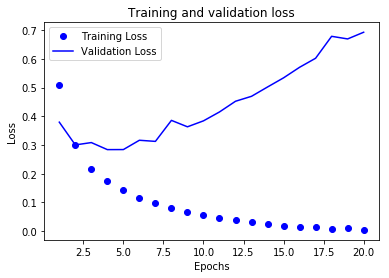

In [12]:
# Plotting Training and Validation Curves
# This time - Loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

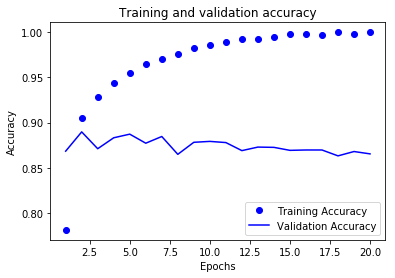

In [15]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 272us/step - loss: 0.5326 - acc: 0.7917 - val_loss: 0.4064 - val_acc: 0.8700
Epoch 2/4
15000/15000 [==============================] - 3s 224us/step - loss: 0.3258 - acc: 0.8987 - val_loss: 0.3154 - val_acc: 0.8851
Epoch 3/4
15000/15000 [==============================] - 3s 220us/step - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2827 - val_acc: 0.8899
Epoch 4/4
15000/15000 [==============================] - 3s 218us/step - loss: 0.1866 - acc: 0.9397 - val_loss: 0.2862 - val_acc: 0.8838


In [17]:
# make a new prediction
# This will generate the likelihood of reviews being positive!
model.predict(x_test)

array([[0.33491254],
       [0.9995926 ],
       [0.9345059 ],
       ...,
       [0.1444511 ],
       [0.19112667],
       [0.6551966 ]], dtype=float32)

### Experimentation
Considering 2 hidden layers overfit, lets try reducing the hidden layers and seeing if we can get a better result

Then, we will try to reduce the number of hidden units

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 242us/step - loss: 0.4884 - acc: 0.7979 - val_loss: 0.3805 - val_acc: 0.8737
Epoch 2/5
15000/15000 [==============================] - 3s 217us/step - loss: 0.3098 - acc: 0.9045 - val_loss: 0.3276 - val_acc: 0.8742
Epoch 3/5
15000/15000 [==============================] - 3s 219us/step - loss: 0.2404 - acc: 0.9251 - val_loss: 0.3007 - val_acc: 0.8801
Epoch 4/5
15000/15000 [==============================] - 3s 220us/step - loss: 0.1991 - acc: 0.9387 - val_loss: 0.2792 - val_acc: 0.8887
Epoch 5/5
15000/15000 [==============================] - 3s 218us/step - loss: 0.1708 - acc: 0.9481 - val_loss: 0.2789 - val_acc: 0.8875


In [21]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 4s 243us/step - loss: 0.5660 - acc: 0.7711 - val_loss: 0.4753 - val_acc: 0.8578
Epoch 2/8
15000/15000 [==============================] - 3s 219us/step - loss: 0.4033 - acc: 0.8877 - val_loss: 0.3876 - val_acc: 0.8687
Epoch 3/8
15000/15000 [==============================] - 3s 217us/step - loss: 0.3201 - acc: 0.9089 - val_loss: 0.3344 - val_acc: 0.8849
Epoch 4/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.2652 - acc: 0.9225 - val_loss: 0.3066 - val_acc: 0.8855
Epoch 5/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.2276 - acc: 0.9323 - val_loss: 0.2887 - val_acc: 0.8908
Epoch 6/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.1991 - acc: 0.9416 - val_loss: 0.2790 - val_acc: 0.8889
Epoch 7/8
15000/15000 [==============================] - 3s 219us/step - loss: 0.1775 - acc: 0.9489 - val_loss: 0.2761 - val_acc

In [24]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 4s 252us/step - loss: 0.6396 - acc: 0.6273 - val_loss: 0.5820 - val_acc: 0.6807
Epoch 2/8
15000/15000 [==============================] - 3s 219us/step - loss: 0.5349 - acc: 0.7590 - val_loss: 0.5256 - val_acc: 0.8116
Epoch 3/8
15000/15000 [==============================] - 3s 219us/step - loss: 0.4798 - acc: 0.8439 - val_loss: 0.4951 - val_acc: 0.8356
Epoch 4/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.4434 - acc: 0.8863 - val_loss: 0.4898 - val_acc: 0.8118
Epoch 5/8
15000/15000 [==============================] - 3s 217us/step - loss: 0.4163 - acc: 0.9093 - val_loss: 0.4664 - val_acc: 0.8544
Epoch 6/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.3930 - acc: 0.9279 - val_loss: 0.4612 - val_acc: 0.8567
Epoch 7/8
15000/15000 [==============================] - 3s 218us/step - loss: 0.3745 - acc: 0.9385 - val_loss: 0.4481 - val_acc